# DBSCAN Clustering

The DBSCAN approach to clustering is more similar to _k-Nearest Neighbour_ (clustering and regression). Clusters are formed by finding neighbouring points (data items that are close together). There are two key hyperparameters: $\epsilon$ which is the acceptable distance between points to consider them neighbours and _min\_smaples_ which is the minimum number of neighbouring data points to form a unique cluster. In other words, if we have _min\_smaples_ of 5 and then 5x points within the $\epsilon$ distance then these can form a new cluster. Any datapoints that can't find a cluster based on these rules are considered outliers and not assigned. Note, there is no value for _K_ as the number of clusters is decided by the above decision rule (as many clusters form as are possible to be formed given those limitations.

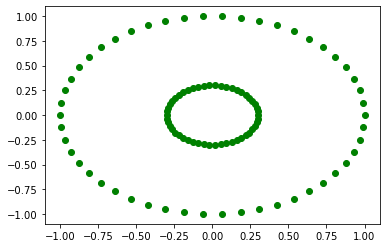

In [1]:
# import generator and create data
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=.3) # factor determines the gap between circles

# visualise data using Matplotlib
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], color = 'g') 
plt.show() 

In [2]:
# import and fit DBSCAN clustering to the data
from sklearn.cluster import dbscan
clustering = dbscan(X)

<AxesSubplot:xlabel='x1', ylabel='x2'>

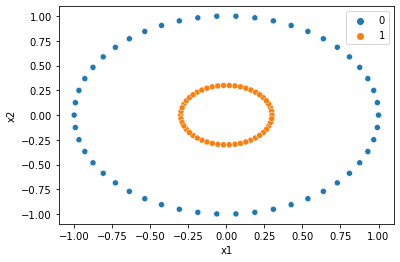

In [3]:
# create a Pandas dataframe containing X and the cluster label
import pandas as pd
df = pd.DataFrame(data={'x1': X[:, 0], 'x2': X[:, 1], 'label': clustering[1]})

# visualising the cluster analysis using Seaborn
import seaborn as sns
sns.scatterplot(data=df, x='x1', y='x2', hue=df.label.to_list())

As we can see, it has done a perfect job. The inner circle has been identified as a cluster (coloured orange) and the outer circle another (blue). Let's given it more of a challenge:

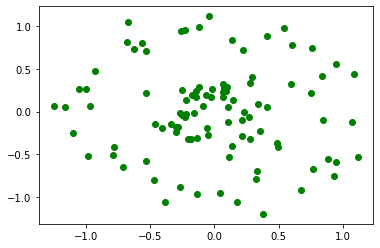

In [4]:
# create and visualise some messy data
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=.3, noise=0.15) # with noise 

# visualise with Matplotlib
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], color = 'g') 
plt.show() 

<AxesSubplot:xlabel='x1', ylabel='x2'>

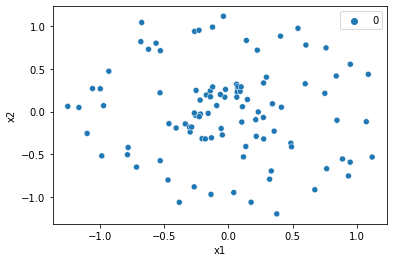

In [5]:
# fit DBSCAN with epsilon = 0.75
clustering = dbscan(X, eps=0.75)

# create a Pandas dataframe containing X and the cluster label
df = pd.DataFrame(data={'x1': X[:, 0], 'x2': X[:, 1], 'label': clustering[1]})

# visualising the cluster analysis using Seaborn
sns.scatterplot(data=df, x='x1', y='x2', hue=df.label.to_list())

With a high value for $\epsilon$ (0.75), the algorithm has found only one big clusters (0). Let's try a lower value:

<AxesSubplot:xlabel='x1', ylabel='x2'>

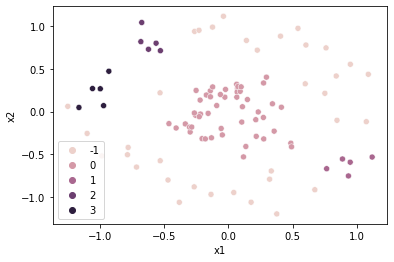

In [6]:
# fit DBSCAN with epsilon = 0.25
clustering = dbscan(X, eps=0.25)

# create a Pandas dataframe containing X and the cluster label
df = pd.DataFrame(data={'x1': X[:, 0], 'x2': X[:, 1], 'label': clustering[1]})

# visualising the cluster analysis using Seaborn
sns.scatterplot(data=df, x='x1', y='x2', hue=df.label.to_list())

Here we have four clusters (0-3). THere are also some outliers (-1).

<AxesSubplot:xlabel='x1', ylabel='x2'>

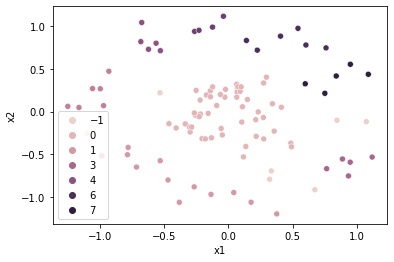

In [7]:
# fit DBSCAN with epsilon = 0.25 and min_samples=3
clustering = dbscan(X, eps=0.25, min_samples=3)

# create a Pandas dataframe containing X and the cluster label
df = pd.DataFrame(data={'x1': X[:, 0], 'x2': X[:, 1], 'label': clustering[1]})

# visualising the cluster analysis using Seaborn
sns.scatterplot(data=df, x='x1', y='x2', hue=df.label.to_list())

Here we have reduced the _min\_samples_ from 5 (default) to 3 and, unsuprisingly, we now have 7 clusters. Let's see the other extreme:

<AxesSubplot:xlabel='x1', ylabel='x2'>

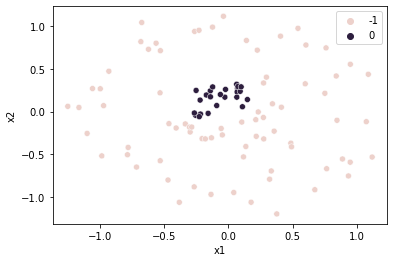

In [8]:
# fit DBSCAN with epsilon = 0.25 and min_samples=20
clustering = dbscan(X, eps=0.25, min_samples=20)

# create a Pandas dataframe containing X and the cluster label
df = pd.DataFrame(data={'x1': X[:, 0], 'x2': X[:, 1], 'label': clustering[1]})

# visualising the cluster analysis using Seaborn
sns.scatterplot(data=df, x='x1', y='x2', hue=df.label.to_list())

With _min\_sample_ = 20 again we end up with one big cluster and some outliers.